In [46]:
import numpy as np
import pandas as pd
import scipy as sc
import math 
import matplotlib.pyplot as plt
from random import random
import statsmodels.api as sm


# Part A: Part A: Winning elections by spending more on campaigns?

### Loading Data: (data3a.xls)

In [5]:
dataColumns = ['state','district', 'democA', 'voteA', 'expendA', 'expendB', 'prtystrA', 'lexpendA', 'lexpendB', 'shareA']
df = pd.read_excel(r'C:\Users\bramg\Documents\data3a.xls', header=None, names=dataColumns)
#df.to_excel(r'C:\Users\bramg\Documents\rawdata3a.xls')

### Descriptive Analysis:


In [15]:
#plotting voting percentage against spending percentage
def scatter(X, y, title, xlabel, ylabel):
    plt.scatter(X, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.show()

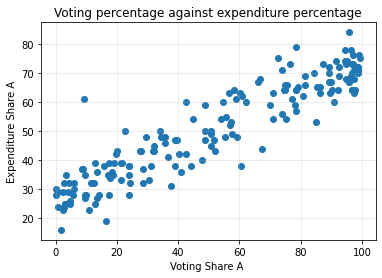

In [50]:
def main():
    vY = df.filter(items=['voteA']).values.reshape(1,-1)
    vX = df.filter(items=['shareA']).values.reshape(1,-1)
    scatter(vX[0], vY[0], "Voting percentage against expenditure percentage", "Voting Share A ", "Expenditure Share A")
main()

In [37]:
#Histogram
def histogram(X, y, title, xlabel, ylabel):
    plt.hist(X, alpha=0.6, bins=15)
    plt.hist(y, alpha=0.6, bins=15)
    #plt.title(title)
    #plt.xlabel(xlabel)
    #plt.ylabel(ylabel)
    plt.show()

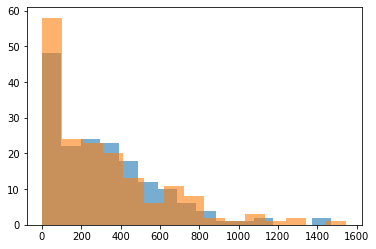

Descriptive Statistics for expenditure A:
count     173.000000
mean      305.088497
std       306.278015
min         0.930000
25%        60.050000
50%       221.530000
75%       450.720000
max      1548.190000
Name: expendB, dtype: float64


In [38]:
def main():
    vX = df.iloc[:,4].values.reshape(1,-1)
    vY = df.iloc[:,5].values.reshape(1,-1)
    histogram(vX[0], vY[0], 'Histogram Expenditure A and B', 'Amount Spended', 'Quantity')
    
    #descriptive statistics
    print('Descriptive Statistics for expenditure A:')
    print(df.iloc[:,5].describe())
main()

In [52]:
def correlationData(data): 
    correlation_df = df.corr()
    print(correlation_df) 

In [53]:
def main():
    correlationData(df)
main()

          district    democA     voteA   expendA   expendB  prtystrA  \
district  1.000000  0.103145  0.039189  0.063714 -0.079974  0.047763   
democA    0.103145  1.000000  0.256944 -0.039453 -0.244604 -0.408579   
voteA     0.039189  0.256944  1.000000  0.395147 -0.419265  0.345809   
expendA   0.063714 -0.039453  0.395147  1.000000  0.373968  0.239574   
expendB  -0.079974 -0.244604 -0.419265  0.373968  1.000000 -0.003157   
prtystrA  0.047763 -0.408579  0.345809  0.239574 -0.003157  1.000000   
lexpendA  0.023150  0.119290  0.620820  0.773281  0.199934  0.276668   
lexpendB -0.095086 -0.239345 -0.647462  0.172919  0.796465 -0.153135   
shareA    0.101476  0.274727  0.925282  0.461615 -0.461417  0.283148   

          lexpendA  lexpendB    shareA  
district  0.023150 -0.095086  0.101476  
democA    0.119290 -0.239345  0.274727  
voteA     0.620820 -0.647462  0.925282  
expendA   0.773281  0.172919  0.461615  
expendB   0.199934  0.796465 -0.461417  
prtystrA  0.276668 -0.153135  0.2

### Simple Linear Regression

In [42]:
def multiLinearRegression(X, y, features):
    sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary(xname=features))

In [49]:
def main():
    vY = df.filter(items=['voteA'])
    vX = df.filter(items=['shareA'])

    features = ['ShareA']


    multiLinearRegression(vX, vY, features)

main()

                                 OLS Regression Results                                
Dep. Variable:                  voteA   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              1733.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):                    9.54e-92
Time:                        00:11:42   Log-Likelihood:                         -724.97
No. Observations:                 173   AIC:                                      1452.
Df Residuals:                     172   BIC:                                      1455.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------